In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = "/content/laboratory data.csv"
df = pd.read_csv(file_path)

In [5]:
#Check 1st & last 5 rows of the data
df.head()

,TypPS,oxygen,pm10,cnt0_5,co,temperature,performance,co2,measuretime,so2,...,health,temperature_o2,cnt2_5,o3,humidity,dHdt,humidity_abs,sound,pm2_5,cnt0_3
0,14.966,20.688,0.007,4.867,1.522,20.867,910.0,548.505,1876,38.461,...,968.0,24.841,0.014,11.550,44.833,-0.03,8.182,21.999,0.0,16.234
1,14.996,20.687,0.001,3.496,1.521,20.865,915.0,543.500,1887,38.462,...,942.0,24.845,0.002,11.520,44.784,-0.06,8.172,24.962,0.0,14.324
2,15.000,20.687,0.000,5.134,1.521,20.866,916.0,542.134,1858,38.463,...,938.0,24.834,0.000,11.506,44.768,-0.07,8.170,25.293,0.0,15.826
3,14.081,20.688,0.213,4.223,1.521,20.864,918.0,539.314,1856,38.462,...,936.0,24.834,0.618,11.438,44.766,-0.04,8.169,26.403,0.0,12.719
4,14.258,20.687,0.152,8.701,1.522,20.867,915.0,543.551,1862,38.462,...,935.0,24.838,0.543,11.393,44.768,0.00,8.170,25.934,0.0,26.107


In [6]:
df.tail()

,TypPS,oxygen,pm10,cnt0_5,co,temperature,performance,co2,measuretime,so2,...,health,temperature_o2,cnt2_5,o3,humidity,dHdt,humidity_abs,sound,pm2_5,cnt0_3
51181,2.257,20.906,4.770,227.998,1.530,24.533,798.0,517.499,2046,176.872,...,820.0,28.700,0.958,28.679,39.472,-0.18,8.888,66.425,4.150,710.289
51182,1.920,20.906,4.169,229.625,1.529,24.546,782.0,524.201,2088,177.372,...,844.0,28.721,0.405,28.932,39.171,-0.30,8.826,65.066,3.800,725.006
51183,1.688,20.907,5.038,228.146,1.529,24.572,772.0,516.942,1827,173.799,...,803.0,28.757,0.529,29.264,38.641,-0.56,8.720,62.035,4.670,721.098
51184,1.515,20.905,5.092,246.341,1.530,24.590,761.0,517.797,1828,167.632,...,790.0,28.797,0.394,29.504,38.329,-0.63,8.658,65.898,4.789,780.604
51185,1.225,20.907,4.216,229.139,1.532,24.614,758.0,512.732,1999,162.133,...,822.0,28.815,0.840,29.658,38.106,-0.60,8.619,64.354,4.177,726.724


In [9]:
#Check the number of data and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51186 entries, 0 to 51185
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TypPS           51186 non-null  float64
 1   oxygen          51186 non-null  float64
 2   pm10            51186 non-null  float64
 3   cnt0_5          51186 non-null  float64
 4   co              51186 non-null  float64
 5   temperature     51186 non-null  float64
 6   performance     51186 non-null  float64
 7   co2             51186 non-null  float64
 8   measuretime     51186 non-null  int64  
 9   so2             51186 non-null  float64
 10  no2             51186 non-null  float64
 11  cnt5            51186 non-null  float64
 12  timestamp       51186 non-null  object 
 13  pm1             51186 non-null  float64
 14  cnt1            51186 non-null  float64
 15  dewpt           51186 non-null  float64
 16  tvoc            51186 non-null  float64
 17  pressure        51186 non-null 

In [10]:
#Check missing values
df.isna().sum()

,0
TypPS,0
oxygen,0
pm10,0
cnt0_5,0
co,0
temperature,0
performance,0
co2,0
measuretime,0
so2,0


In [11]:
# Drop non-numeric columns
if "timestamp" in df.columns:
    df.drop(columns=["timestamp"], inplace=True)

# Handling missing values
imputer = SimpleImputer(strategy="mean")
df[df.columns] = imputer.fit_transform(df)

# Selecting features and target
target = "health"
features = [col for col in df.columns if col != target and col != "measuretime"]

# Splitting data into train and test sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression:
 MAE: 26.82, MSE: 1240.94, R²: 0.87

Random Forest:
 MAE: 0.37, MSE: 14.67, R²: 1.00

Gradient Boosting:
 MAE: 4.94, MSE: 58.93, R²: 0.99

Support Vector Regression:
 MAE: 14.03, MSE: 1742.71, R²: 0.82

K-Nearest Neighbors:
 MAE: 5.56, MSE: 120.97, R²: 0.99

                                 MAE          MSE        R²
Linear Regression          26.823517  1240.937287  0.872134
Random Forest               0.367968    14.672595  0.998488
Gradient Boosting           4.936570    58.928407  0.993928
Support Vector Regression  14.026702  1742.712568  0.820431
K-Nearest Neighbors         5.561575   120.974468  0.987535


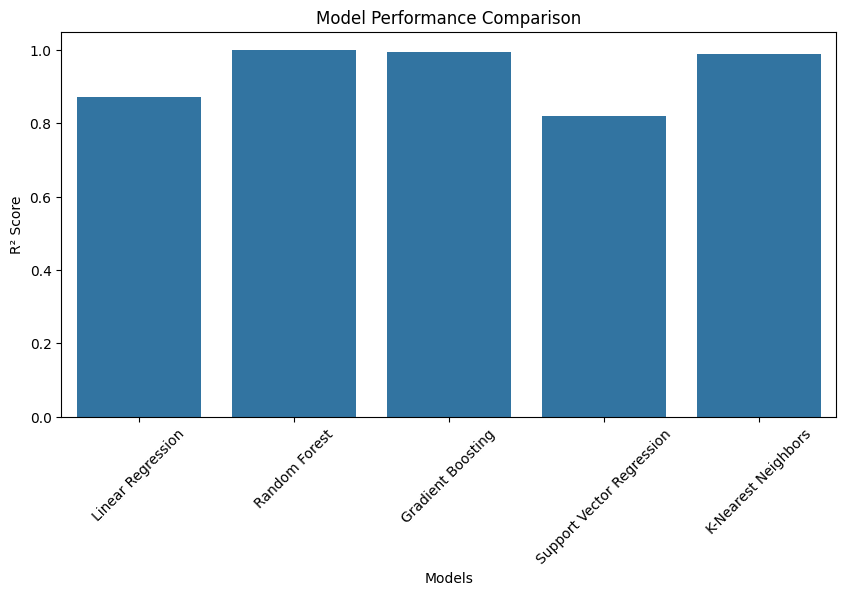

In [12]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R²": r2}
    print(f"{name}:\n MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}\n")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Visualizing model performance
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R²"])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()

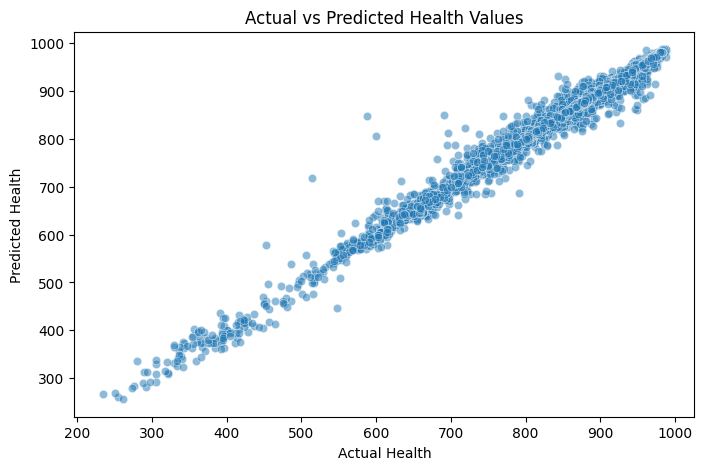

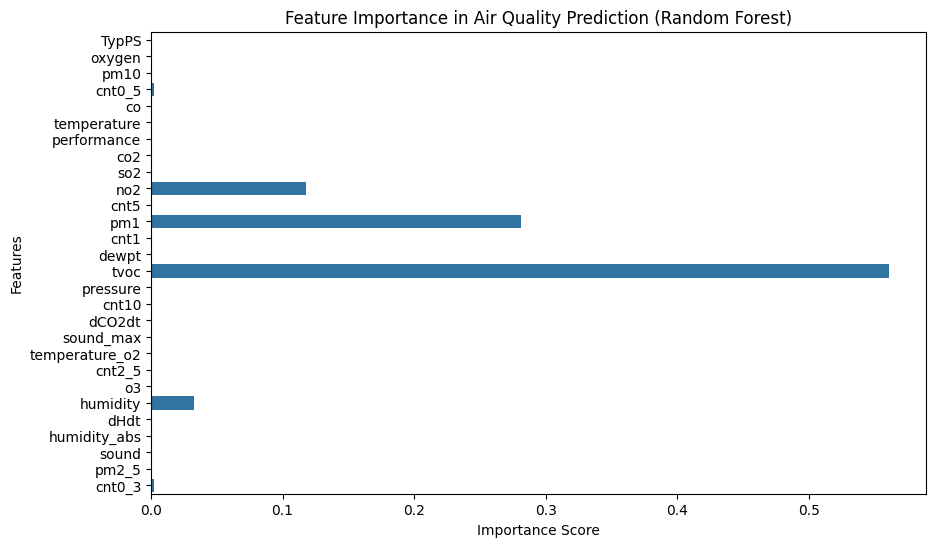

In [24]:
# Feature Importance from Random Forest
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualizing actual vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Health")
plt.ylabel("Predicted Health")
plt.title("Actual vs Predicted Health Values")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Air Quality Prediction (Random Forest)")
plt.show()

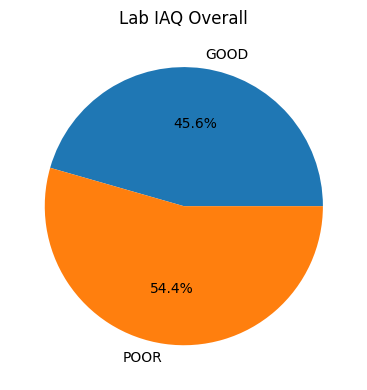

In [22]:
# Selecting features for IAQ classification
lab_features = ['temperature', 'humidity', 'co2', 'tvoc', 'o3', 'pm1', 'pm2_5', 'pm10']
room_features = ['temperature', 'humidity', 'co2', 'tvoc', 'o3', 'pm1', 'pm2_5', 'pm10']

# Creating IAQ classification for Lab and Room
def classify_iaq(data):
    return ((data['pm1'] <= 10) & (data['pm2_5'] <= 25) & (data['pm10'] <= 50) &
            (data['co2'] < 800) & (data['tvoc'] < 300) & (data['o3'] < 18))

def classify_iaq_without_o3(data):
    return ((data['pm1'] <= 10) & (data['pm2_5'] <= 25) & (data['pm10'] <= 50) &
            (data['co2'] < 800) & (data['tvoc'] < 300))

# Processing Lab IAQ Classification
lab_n = df[lab_features].copy()
lab_n['IAQ'] = classify_iaq(lab_n).astype(object).replace({False:'POOR', True:'GOOD'})


# Visualizing Lab IAQ Overall
def plot_iaq_pie(data, column_name, title):
    labels, counts = np.unique(data[column_name].values, return_counts=True)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.pie(counts / len(data), labels=labels, autopct="%.1f%%", colors=["#1f77b4", "#ff7f0e"])
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Plot Lab IAQ Overall
plot_iaq_pie(lab_n, 'IAQ', 'Lab IAQ Overall')

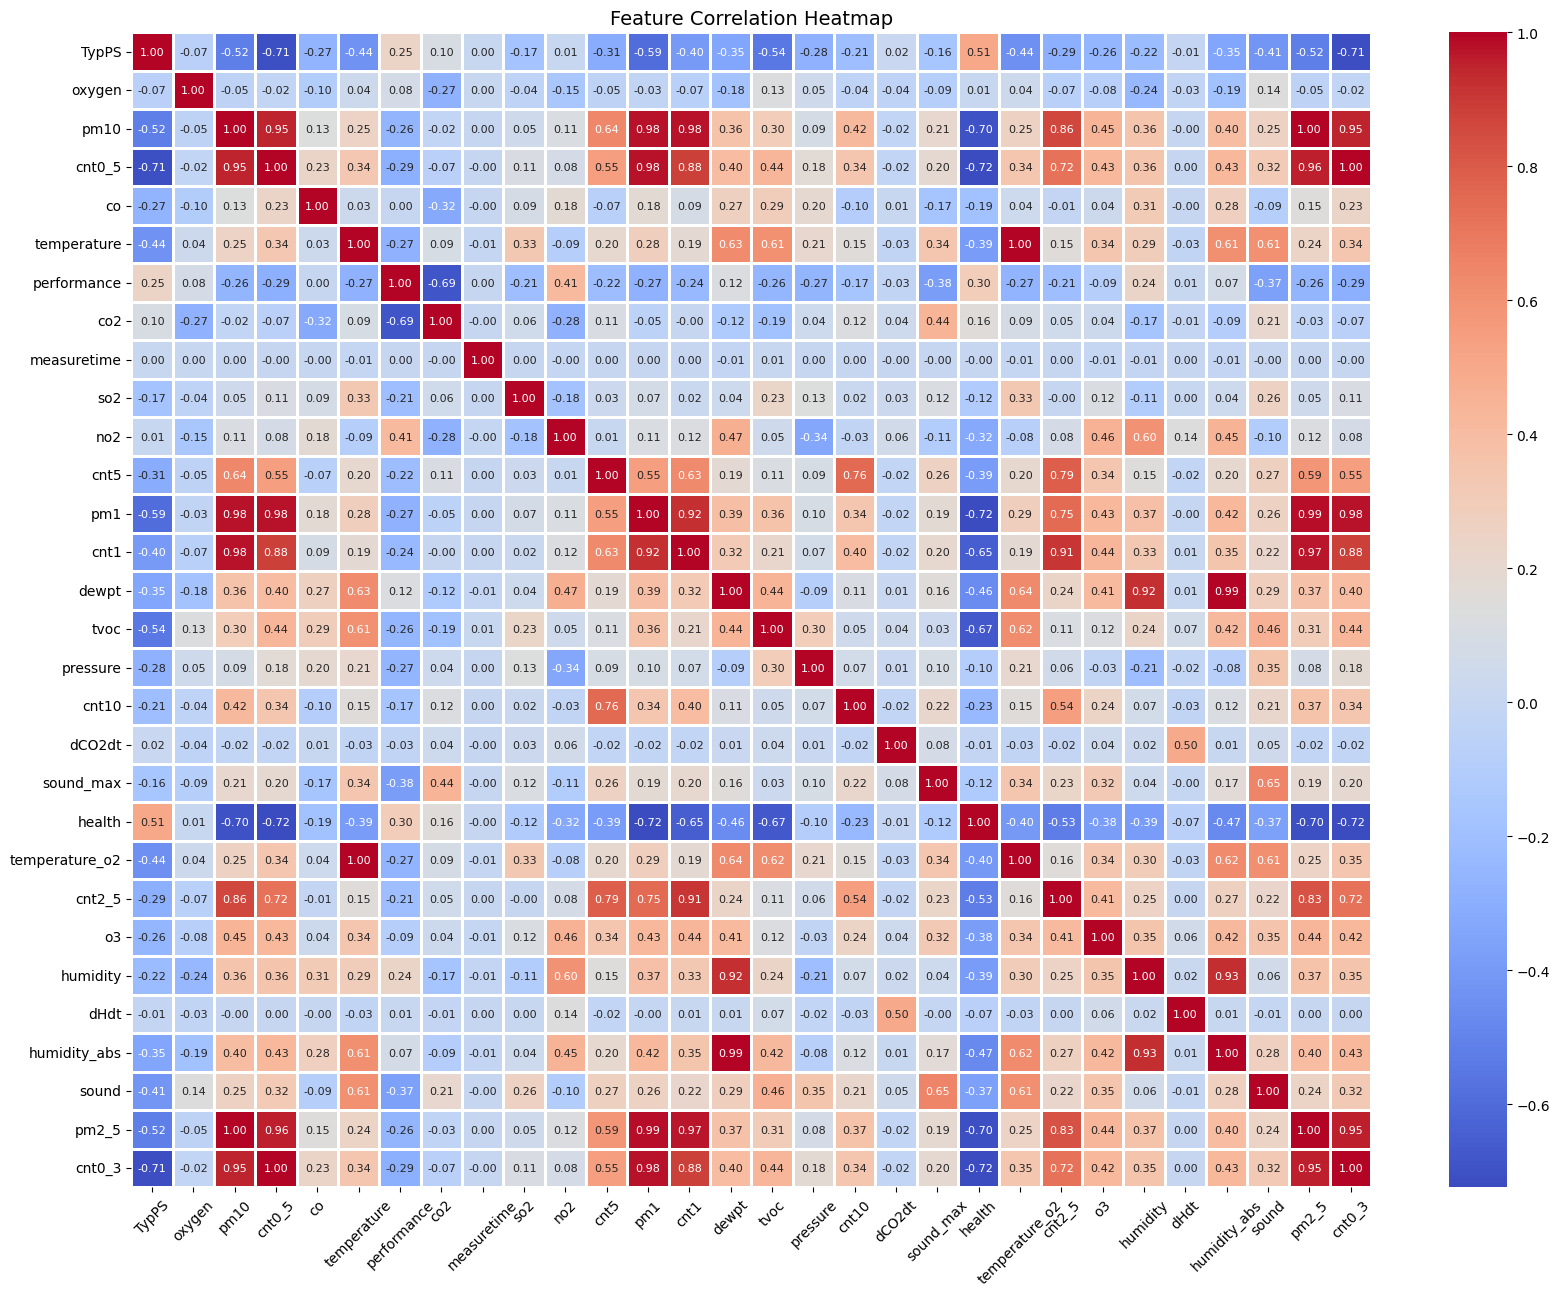

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))  # Increase figure size
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=1, fmt=".2f",
            xticklabels=1, yticklabels=1, annot_kws={"size": 8})  # Adjust font size

plt.title("Feature Correlation Heatmap", fontsize=14)  # Increase title size
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels readable
plt.show()
